# 18 - Multilayer Perceptron Classifier

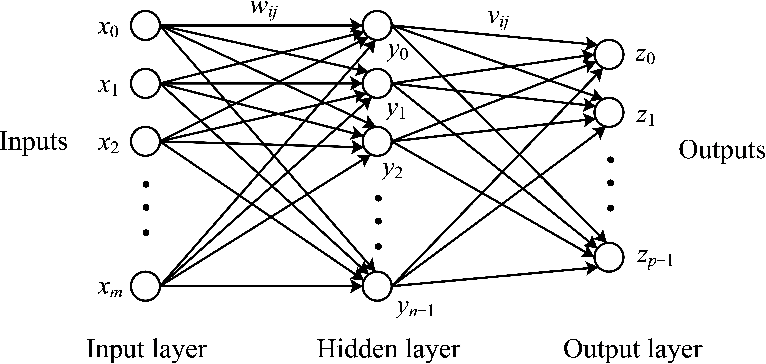

# What is activaion function ? 

*The activation function is the most important factor in a neural network which decided whether or not a neuron will be activated or not and transferred to the next layer. This simply means that it will decide whether the neuron's input to the network is relevant or not in the process of prediction*

*An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations.*

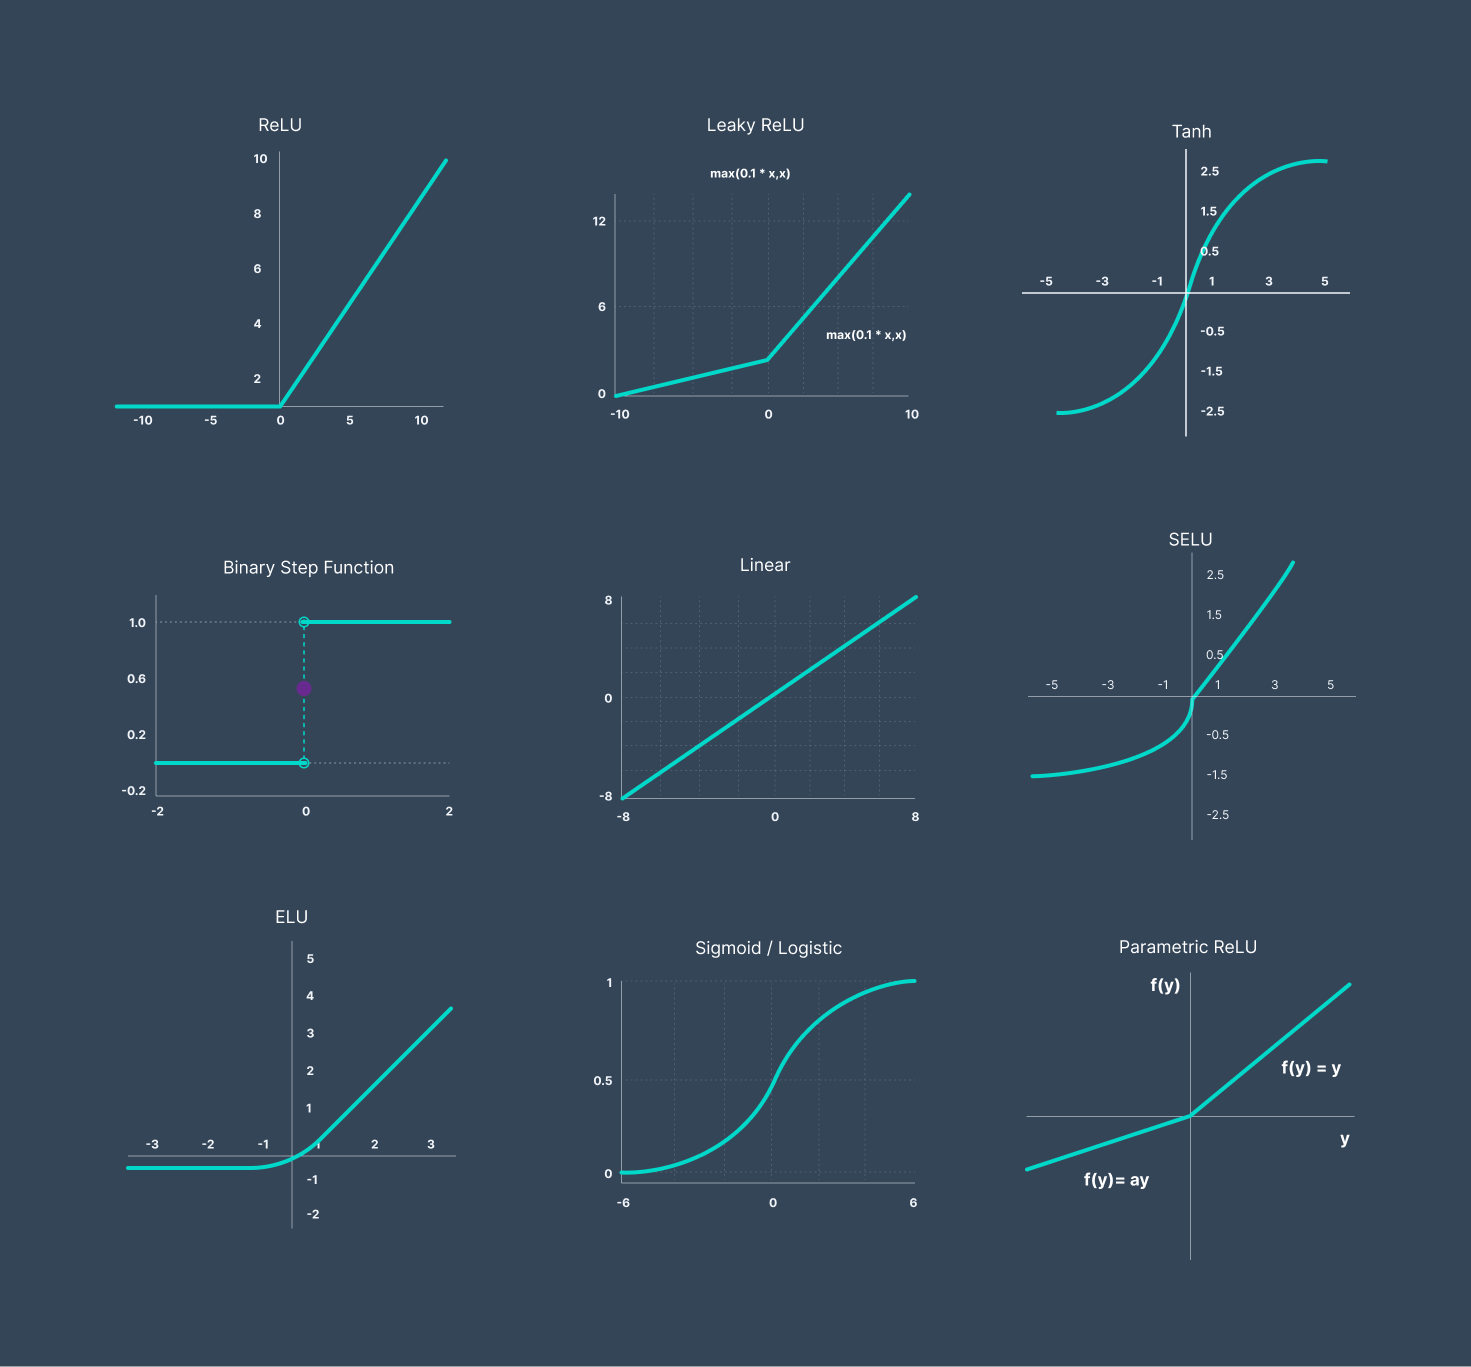

# Get and Prepare Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Get dataset 
df = pd.read_csv("diabetes.csv")
data = df.copy()

# Clear null values
data = data.dropna()

# Declare dependent and independent variables
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

# Split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)


In [2]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Outcome'>

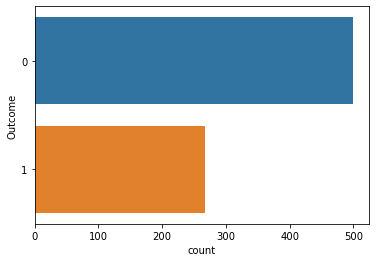

In [3]:
sns.countplot(y="Outcome",data=data)

# Pie Chart

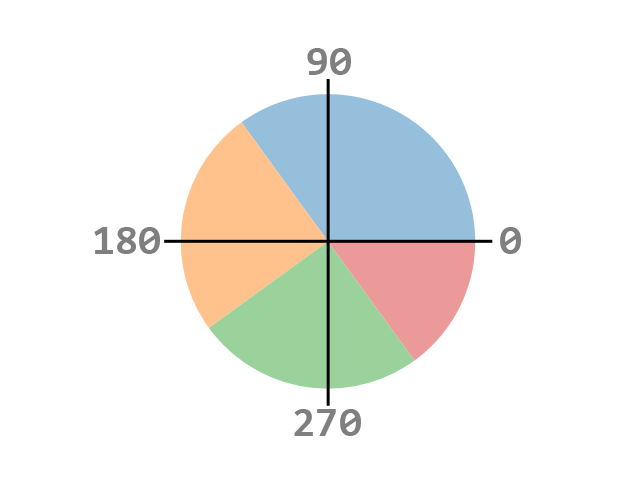

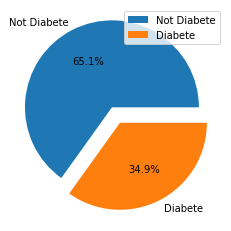

In [4]:
labels = ["Not Diabete","Diabete"]
plt.pie(x=data["Outcome"].value_counts(),labels=labels,explode=(0.1,0.1),autopct='%1.1f%%');
plt.legend()
plt.show()

# Standardization the Dataset

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [6]:
X_scaled_test[:2]

array([[-0.78186097,  0.44131299, -0.98777795, -1.23920118, -0.73828055,
        -0.81490207,  0.62162571,  2.72134199],
       [ 0.3758947 ,  0.47395574,  0.76646362, -1.23920118, -0.73828055,
        -4.73249158,  0.48186468,  3.37528909]])

In [7]:
X_scaled_test[:2]

array([[-0.78186097,  0.44131299, -0.98777795, -1.23920118, -0.73828055,
        -0.81490207,  0.62162571,  2.72134199],
       [ 0.3758947 ,  0.47395574,  0.76646362, -1.23920118, -0.73828055,
        -4.73249158,  0.48186468,  3.37528909]])

# Import the Model

In [8]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

mlp = MLPClassifier()
mlp.fit(X_scaled_train,y_train)
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# Prediction

In [9]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_scaled_test)
print("Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred)))

Test Accuracy Score : 0.73


# Model Tuning with GridSearchCv

In [17]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

mlp_params = {'hidden_layer_sizes':[(64,64),(32,64),(128,128)],
             'max_iter' : [40,50,80],
             'solver':['adam','sgd'],
             'activation':['relu','tanh'],
             'learning_rate': ['constant','adaptive']}

mlp_cv = GridSearchCV(mlp,mlp_params,cv=10).fit(X_scaled_train,y_train)

mlp_cv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (32, 64),
 'learning_rate': 'constant',
 'max_iter': 40,
 'solver': 'adam'}

# Tuned Model with Best Parameters

In [18]:
mlp_tuned = MLPClassifier(hidden_layer_sizes=(32,64),
                          learning_rate='constant',
                          solver='adam',
                         max_iter=40,
                         activation='relu')

mlp_tuned.fit(X_scaled_train,y_train)
mlp_tuned.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (32, 64),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 40,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
# Prediction with tuned model
y_tuned_pred = mlp_tuned.predict(X_scaled_test)

print("Tuned Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_tuned_pred)) )

Tuned Test Accuracy Score : 0.75
